# Sentiment Analysis on Virgin Airline Tweets

### Purpose

To understand the consumer’s voice, the Twitter data analysis plays a vital role. Using sentiment analysis on the tweets, one can recognize positive, negative or neutral tweets. This kind of sentiment analysis makes airline to understand customer feedback and incorporate in a constructive manner. The companies can improve the customer services. Also, this sentiment analysis can help to make better market strategies. Based on sentiment analysis the companies will come to know how customers are thinking and take a competitive advantage

In this project we will use Supervised Machine Learning Techniques to understand whether a tweet hold 'Positive', 'neutral' or 'Negative' sentiment about the Virgin Airline.

### Importing Libraries

In [151]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization library


In [152]:
import pandas as pd
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


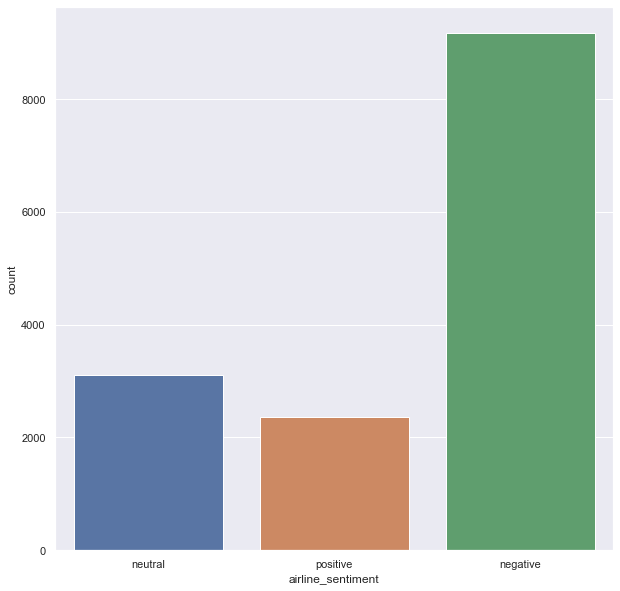

In [163]:
sns.set_theme(style="darkgrid")
sns.countplot(x='airline_sentiment' ,data=df)
sns.set(rc={'figure.figsize':(10,10)})

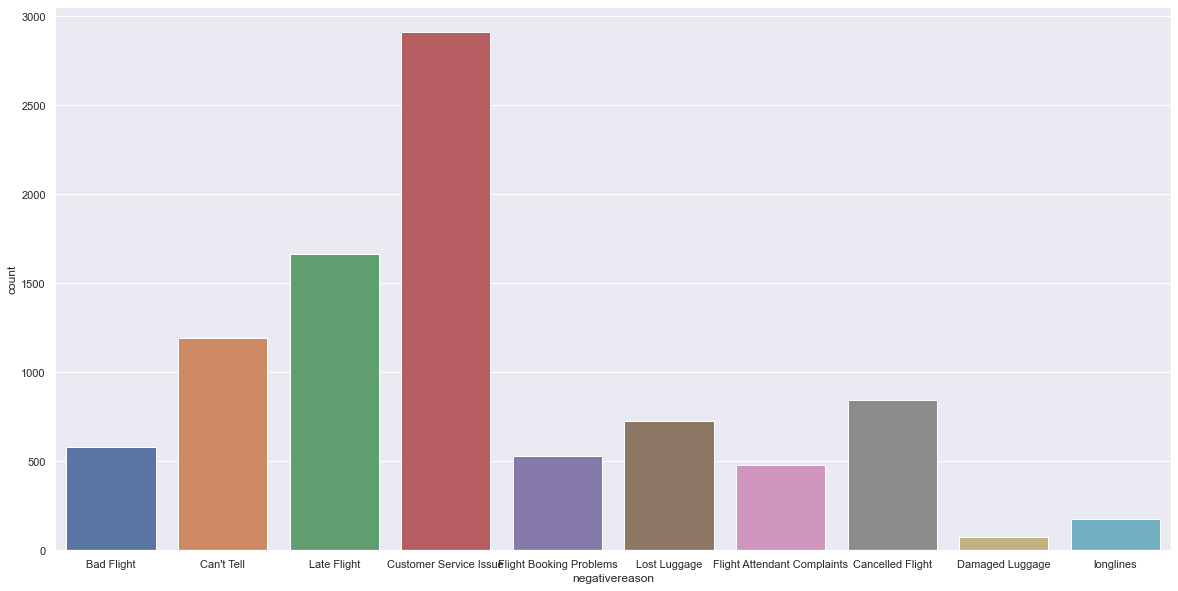

In [155]:
sns.set_theme(style="darkgrid")
sns.countplot(x='negativereason' ,data=df)
sns.set(rc={'figure.figsize':(20,10)})

In [111]:
df.shape

(14640, 15)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Our main Objective is to clean the data

For that we need text and sentiment column of our dataframe

In [113]:
import re

df.text=df.text.apply(lambda x : x.lower())
df.text = df.text.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df.text.head()


0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

Mapping our Sentiments 

In [114]:
df.airline_sentiment=df.airline_sentiment.map({'neutral' : 1, 'positive':1,'negative':0})
df.airline_sentiment[0:10]


0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: airline_sentiment, dtype: int64

Importing Neccesary Natural Language Toolkit for Cleaning the textual data.

Making a function that will 
1. 'lemmatize' the text
2. Convert the text into its 'lower' form
3. 'Tokenize' the text
4. remove 'Stopwords' 
5. 'Join' the text after removing 'stopwords'

In [115]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
def cleanText(text):
    
    lemma = WordNetLemmatizer()
    stp = stopwords.words('english')
    
    # This means remove everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    text = text.lower()
    
    # This mean split sentences by words ("I am good" => ["I","am","good"])
    text = nltk.word_tokenize(text)
    
    # Lemmatizers convert words to their base form using dictionaries (going => go, bees => be , dog => dog)
    text = [lemma.lemmatize(word) for word in text]
    
    # We should remove stopwords, stopwords are the words that has no special meaning such as I,You,Me,Was
    text = [word for word in text if word not in stp]
    
    # Everything is ready, now we just need join the elements of lists (["feel","good"] => "feel good")
    text = " ".join(text)
    
    return text


Lemmatization: Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.



In [116]:
#calling clean_text function created above to clean the text column of our dataframe
clean_text=[]
for w in df.text:
    clean_text.append(cleanText(w))
    

In [117]:
clean_text[1:10]

['virginamerica plus youve added commercial experience tacky',
 'virginamerica didnt today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay 30 flight seat didnt playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm wont go away',
 'virginamerica really missed prime opportunity men without hat parody httpstcomwpg7grezp',
 'virginamerica well didntbut',
 'virginamerica wa amazing arrived hour early youre good']

In [118]:
x=np.array(clean_text) #'x' contains text features
y=df.airline_sentiment # 'y' conntains the sentiment labels
y=np.array(y)

In [119]:
print(x.shape,y.shape)

(14640,) (14640,)


### Importing test, train and split from sklearn library

We will train 80%  of our data and reamining 20% will be tested.

In [120]:
from sklearn.model_selection import train_test_split
#y = df[['pos_neg','pos_neu','neu_neg']]

#train_vectors = vectorizer.fit_transform(x).toarray()
X_train, X_test , Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Importing Tfidf Vectorizer
Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency:                                       
For more information about how tf-idf works visit:                                                                 
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(11712, 13593) (2928, 13593)


### Multinomial Naive Bayes Classifier

In [122]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(train_vectors, Y_train)

In [123]:
from  sklearn.metrics  import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nb_pred = nb.predict(test_vectors)
nb_acc = accuracy_score(Y_test,nb_pred)*100
nb_prec= precision_score(Y_test,nb_pred)*100
nb_rec= recall_score(Y_test,nb_pred)*100
nb_f1= f1_score(Y_test,nb_pred)*100
nb_acc

77.42486338797814

In [124]:
msg = 'You have been specially selected for 4-day holiday.speak to our live operator and claim'
data = [msg]
vect = vectorizer.transform(data).toarray()
x = nb.predict(vect)
x

array([0], dtype=int64)

### Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_vectors,Y_train)
rf_pred = rf.predict(test_vectors)

rf_acc = accuracy_score(Y_test,rf_pred)*100
rf_prec= precision_score(Y_test,rf_pred)*100
rf_rec= recall_score(Y_test,rf_pred)*100
rf_f1= f1_score(Y_test,rf_pred)*100


In [126]:
rf_acc

80.77185792349727

### Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(train_vectors,Y_train)
dt_pred = dt.predict(test_vectors)
dt_acc = accuracy_score(Y_test,dt_pred)*100
dt_prec= precision_score(Y_test,dt_pred)*100
dt_rec= recall_score(Y_test,dt_pred)*100
dt_f1= f1_score(Y_test,dt_pred)*100
dt_acc

72.60928961748634

### Gradient Boosting Classifier

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_vectors,Y_train)
gb_pred = gb.predict(test_vectors)
gb_acc = accuracy_score(Y_test,gb_pred)*100
gb_prec= precision_score(Y_test,gb_pred)*100
gb_rec= recall_score(Y_test,gb_pred)*100
gb_f1= f1_score(Y_test,gb_pred)*100
gb_acc

76.81010928961749

### Logistic Regression Classifier

In [129]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_vectors, Y_train)
log_pred = log.predict(test_vectors)

log_acc = accuracy_score(Y_test,log_pred)*100
log_prec= precision_score(Y_test,log_pred)*100
log_rec= recall_score(Y_test,log_pred)*100
log_f1= f1_score(Y_test,log_pred)*100
log_acc

82.44535519125684

###  Scoring and Metrics

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

 `Accuracy`  measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

` Precision` tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

`Recall(sensitivity)` tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy.                  

`F1 score` is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best  possible F1 score.

F1 Score = 2*[(precision*recall) / (precision+recall)]

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.



### NAIVE BAYES METRIC SCORE

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, nb_pred)))
print('Precision score: ', format(precision_score(Y_test, nb_pred)))
print('Recall score: ', format(recall_score(Y_test, nb_pred)))
print('F1 score: ', format(f1_score(Y_test, nb_pred)))

Accuracy score:  0.7742486338797814
Precision score:  0.921443736730361
Recall score:  0.4102079395085066
F1 score:  0.5676913015042512


### RANDOM FOREST METRIC SCORE

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, rf_pred)))
print('Precision score: ', format(precision_score(Y_test, rf_pred)))
print('Recall score: ', format(recall_score(Y_test, rf_pred)))
print('F1 score: ', format(f1_score(Y_test, rf_pred)))

Accuracy score:  0.8077185792349727
Precision score:  0.7815699658703071
Recall score:  0.6493383742911153
F1 score:  0.7093443469282396


### LOGISTIC REGRESSION METRIC SCORE

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, log_pred)))
print('Precision score: ', format(precision_score(Y_test, log_pred)))
print('Recall score: ', format(recall_score(Y_test, log_pred)))
print('F1 score: ', format(f1_score(Y_test, log_pred)))

Accuracy score:  0.8244535519125683
Precision score:  0.7975929978118161
Recall score:  0.6890359168241966
F1 score:  0.7393509127789047


### GRADIENT BOOSTING SCORE

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, gb_pred)))
print('Precision score: ', format(precision_score(Y_test, gb_pred)))
print('Recall score: ', format(recall_score(Y_test, gb_pred)))
print('F1 score: ', format(f1_score(Y_test, gb_pred)))

Accuracy score:  0.7681010928961749
Precision score:  0.7457846952010376
Recall score:  0.5434782608695652
F1 score:  0.6287588846364134


### Comparing Metric Scores

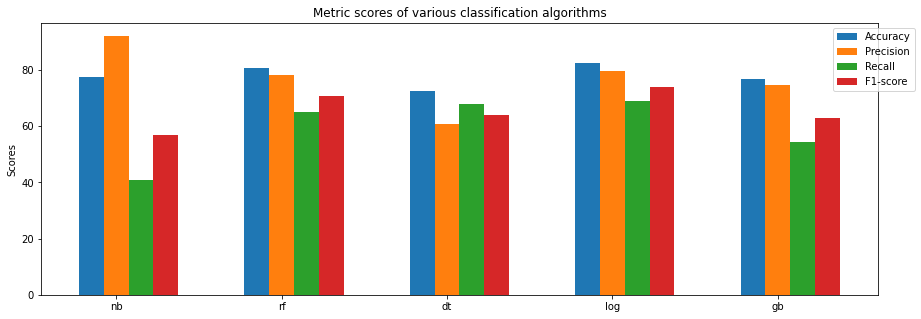

In [134]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['nb','rf','dt','log','gb']
accuracy=[nb_acc,rf_acc,dt_acc,log_acc,gb_acc]
precision=[nb_prec,rf_prec,dt_prec,log_prec,gb_prec]
recall=[nb_rec,rf_rec,dt_rec,log_rec,gb_rec]
f1_score=[nb_f1,rf_f1,dt_f1,log_f1,gb_f1]

width = 0.3  
r1 = np.arange(0,len(labels)*2,2) 
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]


rects1 = plt.bar(r1, accuracy, width, label='Accuracy')
rects2 = plt.bar(r2, precision, width, label='Precision')
rects3 = plt.bar(r3, recall, width, label='Recall')
rects4 = plt.bar(r4, f1_score, width, label='F1-score')
plt.rcParams["figure.figsize"] = (15,5)

plt.ylabel('Scores')
plt.title('Metric scores of various classification algorithms')
plt.xticks([r + width for r in range(0,len(labels)*2,2)], ['nb','rf','dt','log','gb'])
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.show()


Here we can the see how well various Machine Learning Classifier performs on our dataset, their scores tells us that the overall performance of 'Logistic Regression' performs better on the given set.

If a new tweet about Virgin Airline comes this Machine Learning Algorithm will Automatically tell us that the tweet is
'Positive', 'Neutral' or 'Negative'.                            
For Example:

In [137]:
msg = 'southwestair cant believe many paying customer left high dry reason flight cancelled flightlations monday bdl wow'
data = [msg]
vect = vectorizer.transform(data).toarray()
x = gb.predict(vect)
x

array([0], dtype=int64)

A Negative Message is claimed to be a 'Negative' message